<div style="float:right;padding-top:20px">
   <img src="https://www.enib.fr/images/logo-enib-accueil.jpg" style="width:120px"/>
</div>

# Synthèse filtre HP

<div style="padding-top: 40px">
<div class="alert alert-info" role="alert" >
    <ul>
        <li><b>Contributors:</b> CARREE Ewan / BONNEC Erlé / MESNAGE Lilian / POILANE Ismaël</li>
    </ul>
</div>
</div>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti
from math import pi

The circuit transfer function is given by :
$$T(p)=\frac{b0+b1p+b2p^2}{1+2mp/w0+p^2/w0^2}$$

Définition des paramètres influencant le système : 

In [46]:
m= np.array([0.25,0.5,0.707,1,5])
f0 = np.array([1000,10000,100000])

## Réponse indicielle

La réponse indicielle est influencé par m qui définit les pseudos oscillations

$$e(t)=\left\{\begin{array}{cc}
1 &\text{ si } t\ge 0\\
0 & \text{ ailleurs}\\
\end{array}\right.$$

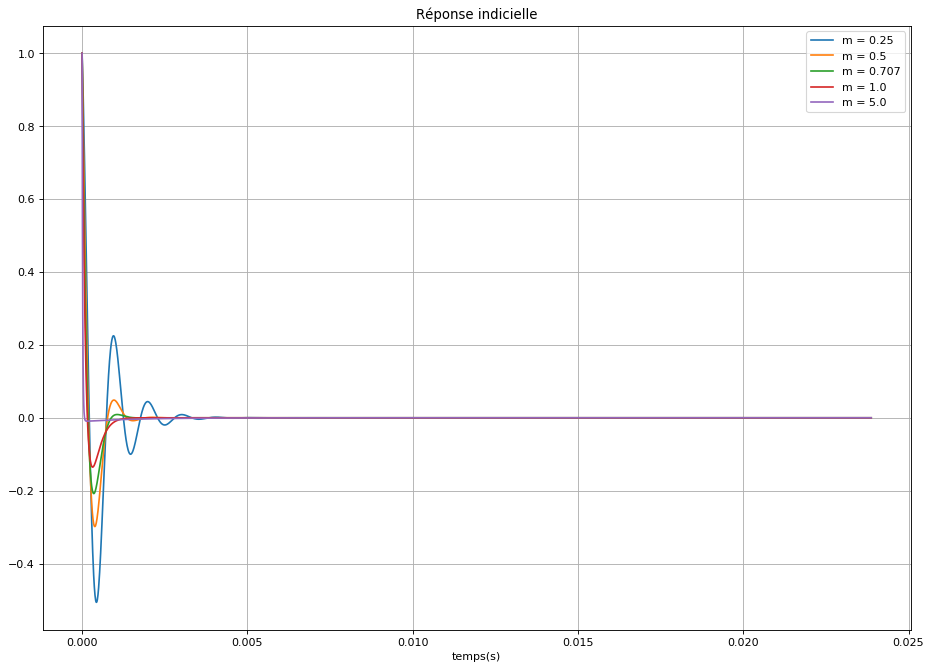

In [47]:
plt.figure(figsize=(14,10), dpi=80)

Te = 0.00001 #periode d'echantillonage des calculs
Tau = 1/(2*pi*f0[0]) #constante de temps du systeme
t = np.arange(0, 150*Tau, Te) #definition des instants où seront calculés les signaux

for x in range (0, len(m)) :
    den = [1/(2*pi*f0[0])**2,2*m[x]/(2*pi*f0[0]), 1] #coef du polynome dans l'ordre decroissant des puissance (de jw) JUSQUA 0
    num = [1/(2*pi*f0[0])**2,0,0]
    H = lti(num,den)
    t,s = H.step(T=t)
    plt.figure(1)
    plt.plot(t,s,label = "m = "+str(m[x]) )

plt.figure(1)
plt.xlabel("temps(s)")
plt.title("Réponse indicielle")
plt.grid()
plt.legend()
plt.show()

## Courbe de module

<Figure size 1120x800 with 0 Axes>

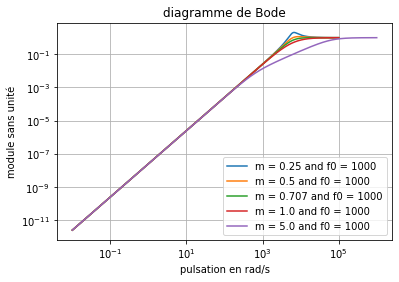

In [48]:
plt.figure(figsize=(14,10), dpi=80)

for x in range (0,len(m)):
    den = [1/(2*pi*f0[0])**2,2*m[x]/(2*pi*f0[0]), 1] #coef du polynome dans l'ordre decroissant des puissance (de jw) JUSQUA 0
    num = [1/(2*pi*f0[0])**2,0,0]
    THP = lti(num,den) #generation du systeme linéaire correspondant à cette fonctionde transfert
    [w,T]=THP.freqresp() #calcul de Tcomplexe pour toutes les pulsations
    mod=abs(T) #definition du module
    arg=180*np.angle(T)/pi #definition de l'argument en degrés
    plt.figure(2)
    plt.loglog(w,mod,label = "m = "+str(m[x])+ " and f0 = "+str(f0[0])) #trace sur echelles log log avec legende correspondante à la trace calculée 
    
plt.figure(2)
plt.ylabel("module sans unité")
plt.xlabel("pulsation en rad/s")
plt.title("diagramme de Bode")
plt.grid()
plt.legend()
plt.show()

## Réponse impulsionnelle

$$e(t)=\delta(t)$$

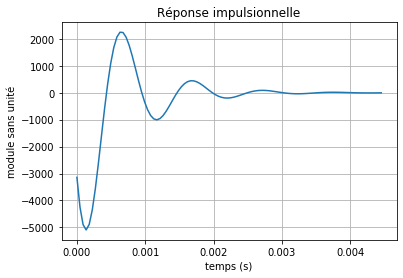

In [49]:
plt.figure(3)
den = [1/(2*pi*f0[0])**2,2*m[0]/(2*pi*f0[0]), 1] #coef du polynome dans l'ordre decroissant des puissance (de jw) JUSQUA 0
num = [1/(2*pi*f0[0])**2,0,0]
IMP = lti(num,den) #generation du systeme linéaire correspondant à cette fonctionde transfert
t,s = IMP.impulse()
plt.plot(t,s)
plt.ylabel("module sans unité")
plt.xlabel("temps (s)")
plt.title("Réponse impulsionnelle")
plt.grid()
#plt.legend()
plt.show()

## Réponse Fréquentielle

La réponse fréquentielle est influencée par w0 et plus particulièrement f0

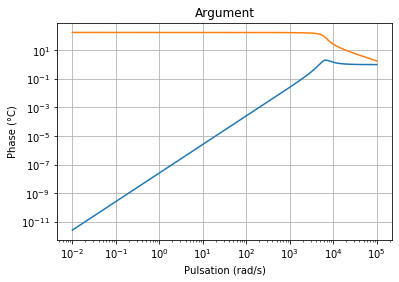

In [50]:
plt.figure(4)
den = [1/(2*pi*f0[0])**2,2*m[0]/(2*pi*f0[0]), 1] #coef du polynome dans l'ordre decroissant des puissance (de jw) JUSQUA 0
num = [1/(2*pi*f0[0])**2,0,0]
FRE = lti(num,den) #generation du systeme linéaire correspondant à cette fonctionde transfert
w, Hjw = FRE.freqresp()
plt.loglog(w, np.abs(Hjw))
plt.xlabel("Pulsation (rad/s)")
plt.ylabel("Phase (°C)")
plt.title("Argument")
plt.semilogx(w, 180*np.angle(Hjw)/np.pi)
plt.grid()
#plt.legend()
plt.show()

## Pôles et zéros

poles m = 0.5 [-31415.9265359+54413.98092703j -31415.9265359-54413.98092703j]
poles m = 1.5 [-164495.9269181   -23999.63229729]


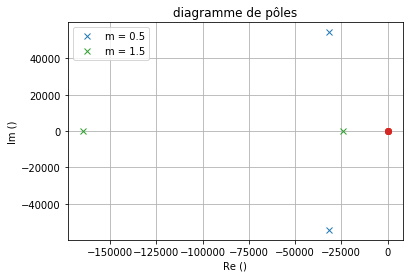

In [51]:
m= [0.5,1.5] #pas la peine de définir un tableau, une liste suffit
f0 = np.array([1000,10000,100000])
num = [1/(2*pi*f0[1])**2,0,0] #le carré n'était pas au bon endroit
for i in range(len(m)): #syntaxe de la boucle permettant de parcourir une liste
	den = [1/(2*pi*f0[1])**2,2*m[i]/(2*pi*f0[1]), 1] #ici non plus
	THP = lti(num,den)
	poles = THP.poles
	zeros = THP.zeros
	
	print("poles m =", m[i],poles) # toujours affichier les valeurs num dans la console pour pouvoir vérifier les calculs
	plt.figure(5)#(figsize=(14,10), dpi=80)


	plt.plot(np.real(poles),np.imag(poles),"x",label = "m = "+str(m[i]))
	plt.plot(np.real(zeros),np.imag(zeros),"o")

plt.figure(5)
plt.xlabel("Re ()")
plt.ylabel("Im ()")
plt.title("diagramme de pôles")
plt.grid()
plt.legend()
plt.show()